In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import time
import glob
import numpy as np
from h5py import File
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from scipy import interpolate

In [3]:
def linkDirectory(path, name=''):
    '''Make files available in working directory with recursive symbolic links'''
    # Check for recursiveness
    if isInDirectory(os.getcwd(), path):
        print(name + ' directory is subdirectory of working directory! runOPAL cannot handle this.. bye!')
        sys.exit()
    # lndir and if fails try cp
    if os.system('lndir '+path) != 0:
        print("lndir failed (possibly doesn't exist on this system), using cp -rs... \n"),
        if os.listdir(path):
            os.system('cp -rs '+path+'/* .')

def isInDirectory(filepath, directory):
    # From https://stackoverflow.com/questions/3812849/how-to-check-whether-a-directory-is-a-sub-directory-of-another-directory
    ''' Check if filepath is inside directory '''
    return os.path.realpath(filepath).startswith(os.path.realpath(directory) + os.sep)


In [4]:
def parse_stat(filename, names = ['t', 's','nPart','charge','energy','rms_x', 'rms_y', 'rms_s', \
                                 'rms_px', 'rms_py', 'rms_ps', 'emit_x', 'emit_y', 'emit_s', 'mean_x', \
                                 'mean_y', 'mean_s', 'ref_x', 'ref_y', 'ref_z', 'ref_px', 'ref_py', 'ref_pz', \
                                 'max_x', 'max_y', 'max_s', 'xpx', 'ypy', 'zpz', 'Dx', 'DDx', 'Dy', 'DDy', \
                                 'Bx_ref', 'By_ref', 'Bz_ref', 'Ex_ref', 'Ey_ref', 'Ez_ref', 'dE', 'dt', 'partsOutside',\
                                 'DebyeLength', 'plasmaParameter', 'temperature', 'rmsDensity']):
    dist = {}
    data = np.loadtxt(filename, skiprows=303)
    for i,name in enumerate(names):
        dist[name] = data[:,i]
        
    print('get better parser from nicole')
    return dist

get better parser from nicole
emit_x = 0.56 um
rms_x = 0.16 mm
rms_s = 1.05 mm
energy = 96.54 MeV


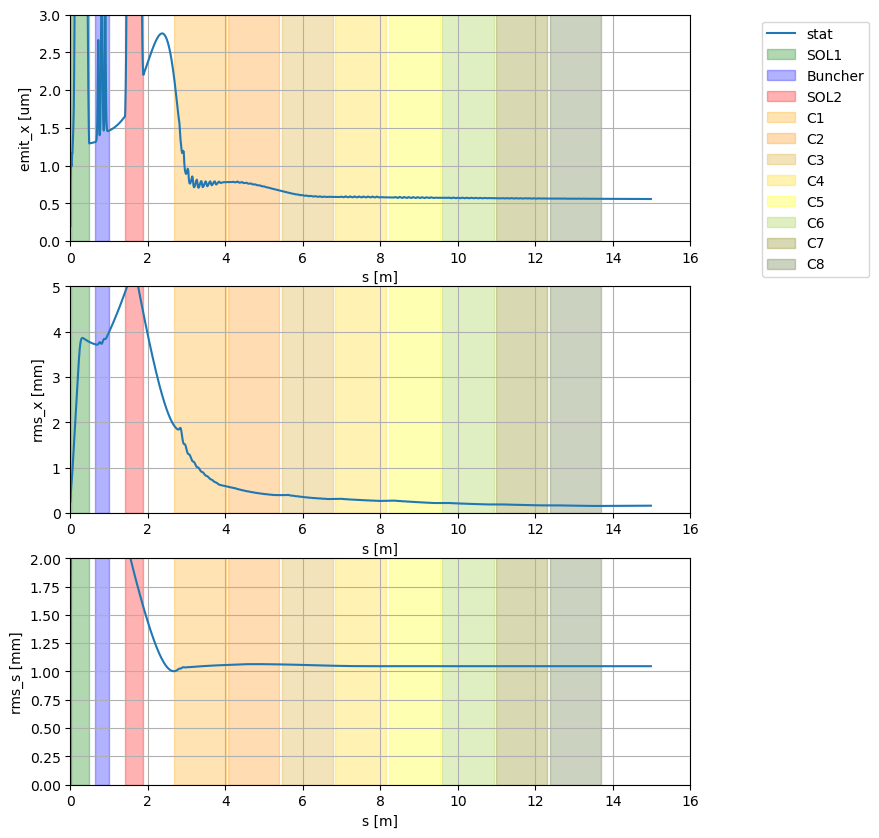

In [5]:
stat = parse_stat('/sdf/data/ad/ard/u/paris/Cathode_shaping/1pert_2pS_amp0.2_100pC/sim-5/sc_inj.stat')

xmeter = 16

#fig, ax = plt.subplots(figsize = (12,5))
fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (8,10))
ax[0].plot(stat['s'], stat['emit_x']*1e6, label = 'stat')

ax[0].fill_between([0.00653,0.48653], 0,100, color='green', alpha=0.3, label = 'SOL1')
ax[0].fill_between([0.6300495,0.9881825], 0,100, color='blue', alpha=0.3, label = 'Buncher')
ax[0].fill_between([1.40581,1.88581], 0,100, color='red', alpha=0.3, label = 'SOL2')
ax[0].fill_between([2.6833989, 4.0021969], 0,100, color='orange', alpha=0.3, label = 'C1')
ax[0].fill_between([4.0669989, 5.3857969], 0,100, color='darkorange', alpha=0.3, label = 'C2')
ax[0].fill_between([5.4505989, 6.7693969], 0,100, color='goldenrod', alpha=0.3, label = 'C3')
ax[0].fill_between([6.8341989, 8.1529969], 0,100, color='gold', alpha=0.3, label = 'C4')
ax[0].fill_between([8.2177989, 9.5365969], 0,100, color='yellow', alpha=0.3, label = 'C5')
ax[0].fill_between([9.6013989, 10.9201969], 0,100, color='yellowgreen', alpha=0.3, label = 'C6')
ax[0].fill_between([10.9849989, 12.3037969], 0,100, color='olive', alpha=0.3, label = 'C7')
ax[0].fill_between([12.3685989, 13.6873969], 0,100, color='darkolivegreen', alpha=0.3, label = 'C8')
ax[0].set_xlabel('s [m]')

#lines_str = [str(x) for x in best_sort] + ['SOL1', 'Buncher', 'SOL2', 'C1'] #, 'C2', 'C3', 'C4', \
          #'C5', 'C6', 'C7', 'C8']
ax[0].legend(loc = 1, bbox_to_anchor = [1.3, 1])
                      
#ax.legend( lines_str, loc = 'upper left')
#ax.set_ylabel('emit_x [um]')
ax[0].set_ylabel('emit_x [um]')
ax[0].set_ylim((0,3))
ax[0].set_xlim((0,xmeter)) #

ax[1].plot(stat['s'], stat['rms_x']*1e3, label = 'stat')

ax[1].fill_between([0.00653,0.48653], 0,100, color='green', alpha=0.3, label = 'SOL1')
ax[1].fill_between([0.6300495,0.9881825], 0,100, color='blue', alpha=0.3, label = 'Buncher')
ax[1].fill_between([1.40581,1.88581], 0,100, color='red', alpha=0.3, label = 'SOL2')
ax[1].fill_between([2.6833989, 4.0021969], 0,100, color='orange', alpha=0.3, label = 'C1')
ax[1].fill_between([4.0669989, 5.3857969], 0,100, color='darkorange', alpha=0.3, label = 'C2')
ax[1].fill_between([5.4505989, 6.7693969], 0,100, color='goldenrod', alpha=0.3, label = 'C3')
ax[1].fill_between([6.8341989, 8.1529969], 0,100, color='gold', alpha=0.3, label = 'C4')
ax[1].fill_between([8.2177989, 9.5365969], 0,100, color='yellow', alpha=0.3, label = 'C5')
ax[1].fill_between([9.6013989, 10.9201969], 0,100, color='yellowgreen', alpha=0.3, label = 'C6')
ax[1].fill_between([10.9849989, 12.3037969], 0,100, color='olive', alpha=0.3, label = 'C7')
ax[1].fill_between([12.3685989, 13.6873969], 0,100, color='darkolivegreen', alpha=0.3, label = 'C8')
ax[1].set_xlabel('s [m]')
ax[1].set_ylim((0,5))
ax[1].set_xlim((0,xmeter))
#ax[1].legend()
ax[1].set_ylabel('rms_x [mm]')

ax[2].plot(stat['s'], stat['rms_s']*1e3, label = 'stat')

ax[2].fill_between([0.00653,0.48653], 0,100, color='green', alpha=0.3, label = 'SOL1')
ax[2].fill_between([0.6300495,0.9881825], 0,100, color='blue', alpha=0.3, label = 'Buncher')
ax[2].fill_between([1.40581,1.88581], 0,100, color='red', alpha=0.3, label = 'SOL2')
ax[2].fill_between([2.6833989, 4.0021969], 0,100, color='orange', alpha=0.3, label = 'C1')
ax[2].fill_between([4.0669989, 5.3857969], 0,100, color='darkorange', alpha=0.3, label = 'C2')
ax[2].fill_between([5.4505989, 6.7693969], 0,100, color='goldenrod', alpha=0.3, label = 'C3')
ax[2].fill_between([6.8341989, 8.1529969], 0,100, color='gold', alpha=0.3, label = 'C4')
ax[2].fill_between([8.2177989, 9.5365969], 0,100, color='yellow', alpha=0.3, label = 'C5')
ax[2].fill_between([9.6013989, 10.9201969], 0,100, color='yellowgreen', alpha=0.3, label = 'C6')
ax[2].fill_between([10.9849989, 12.3037969], 0,100, color='olive', alpha=0.3, label = 'C7')
ax[2].fill_between([12.3685989, 13.6873969], 0,100, color='darkolivegreen', alpha=0.3, label = 'C8')
ax[2].set_xlabel('s [m]')
ax[2].set_xlabel('s [m]')
ax[2].set_ylim((0,2))
ax[2].set_xlim((0,xmeter))
#ax.legend()
ax[2].set_ylabel('rms_s [mm]')

ax[0].grid()
ax[1].grid()
ax[2].grid()

print('emit_x = %1.2f um' %(stat['emit_x'][-1]*1e6))
print('rms_x = %1.2f mm' %(stat['rms_x'][-1]*1e3))
print('rms_s = %1.2f mm' %(stat['rms_s'][-1]*1e3))
print('energy = %1.2f MeV' %(stat['energy'][-1]))

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

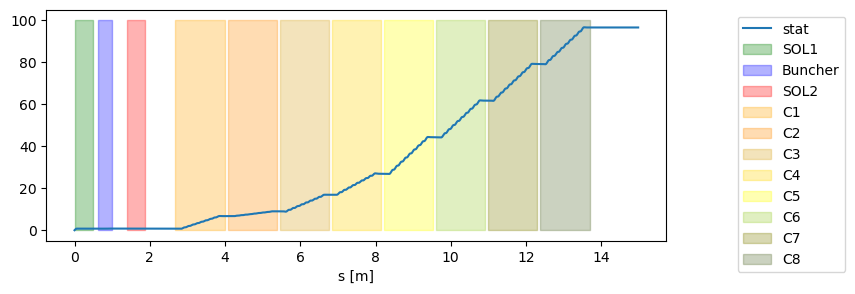

In [6]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,3))
ax = [ax]
ax[0].plot(stat['s'], stat['energy'], label = 'stat')

ax[0].fill_between([0.00653,0.48653], 0,100, color='green', alpha=0.3, label = 'SOL1')
ax[0].fill_between([0.6300495,0.9881825], 0,100, color='blue', alpha=0.3, label = 'Buncher')
ax[0].fill_between([1.40581,1.88581], 0,100, color='red', alpha=0.3, label = 'SOL2')
ax[0].fill_between([2.6833989, 4.0021969], 0,100, color='orange', alpha=0.3, label = 'C1')
ax[0].fill_between([4.0669989, 5.3857969], 0,100, color='darkorange', alpha=0.3, label = 'C2')
ax[0].fill_between([5.4505989, 6.7693969], 0,100, color='goldenrod', alpha=0.3, label = 'C3')
ax[0].fill_between([6.8341989, 8.1529969], 0,100, color='gold', alpha=0.3, label = 'C4')
ax[0].fill_between([8.2177989, 9.5365969], 0,100, color='yellow', alpha=0.3, label = 'C5')
ax[0].fill_between([9.6013989, 10.9201969], 0,100, color='yellowgreen', alpha=0.3, label = 'C6')
ax[0].fill_between([10.9849989, 12.3037969], 0,100, color='olive', alpha=0.3, label = 'C7')
ax[0].fill_between([12.3685989, 13.6873969], 0,100, color='darkolivegreen', alpha=0.3, label = 'C8')
ax[0].set_xlabel('s [m]')

#lines_str = [str(x) for x in best_sort] + ['SOL1', 'Buncher', 'SOL2', 'C1'] #, 'C2', 'C3', 'C4', \
          #'C5', 'C6', 'C7', 'C8']
ax[0].legend(loc = 1, bbox_to_anchor = [1.3, 1])
plt.legend

In [7]:
stat['emit_x'][-1]

5.5882136489286e-07

In [18]:
from pmd_beamphysics import ParticleGroup
from pmd_beamphysics.interfaces import opal,elegant
#from pmd_beamphysics.plot import slice_plot
from pmd_beamphysics.statistics import slice_statistics

In [19]:
simdir = '/sdf/data/ad/ard/u/paris/Cathode_shaping/1pert_2pS_amp0.2_100pC/sim-5/'
h = File( os.path.join(simdir,'sc_inj.h5'), 'r')
last = len(h.keys())
step = 'Step#' + str(last-1)
dat_opal = opal.opal_to_data(h[step])
PG = ParticleGroup(data = dat_opal)

In [21]:
PG.norm_emit_x

5.588214731170633e-07

In [26]:
PG.twiss("x", fraction=0.95), PG.twiss("x", fraction=1)

({'alpha_x': -0.2891580412767631,
  'beta_x': 7.609882070814072,
  'gamma_x': 0.14239542252447732,
  'emit_x': 2.114229293631904e-09,
  'eta_x': 5.679101366938695e-05,
  'etap_x': 4.91445350237249e-07,
  'norm_emit_x': 4.015623148038257e-07},
 {'alpha_x': -0.3260729413942494,
  'beta_x': 8.771980330397136,
  'gamma_x': 0.12612016003681698,
  'emit_x': 2.942233072091929e-09,
  'eta_x': -3.819185296229243e-08,
  'etap_x': -5.251776672641671e-08,
  'norm_emit_x': 5.588214731167828e-07})

In [22]:
dir(PG.norm_emit_x)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_interface__',
 '__array_priority__',
 '__array_struct__',
 '__array_wrap__',
 '__bool__',
 '__ceil__',
 '__class__',
 '__class_getitem__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floor__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getformat__',
 '__getitem__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__le__',
 '__lshift__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rlshift__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__rrshift__',
 '__rshift__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',

In [15]:
from pmd_beamphysics.interfaces import opal,elegant
#from pmd_beamphysics.plot import slice_plot
from pmd_beamphysics.statistics import slice_statistics
from  pmd_beamphysics.units import nice_array, nice_scale_prefix


sys.path.append("/sdf/home/p/paris/sdf_beamphysics/paris/software/elegant/")


sys.path.append("/sdf/data/ad/ard/u/paris/LH_shaping/SDDSpy")
import sdds

#from distgen import Generator
#import SDDS 
global pysdds

pysdds = sdds.SDDS(0)

In [16]:
def calc_emit(d):
    #return np.mean(d[5])*np.sqrt([np.linalg.det(np.cov(d[0+i:2+i])) for i in [0,2]])
    return np.mean(dat['p'])*np.sqrt([np.linalg.det(np.cov(np.vstack((dat['x'],dat['xp'])))),np.linalg.det(np.cov(np.vstack((dat['y'],dat['yp']))))]) 


In [41]:
dist = '/sdf/data/ad/ard/u/paris/Cathode_shaping/1pert_2pS_amp0.2_100pC/sim-5/elegant_more_LH/sim_dl1phasedeg_0_dl2phasedeg_0/BC2BCEND.out'
pysdds.load(dist)
c = np.array(pysdds.columnData) #particle data
c = np.squeeze(c)
names = pysdds.columnName

pns = pysdds.parameterName
pds = pysdds.parameterData
params = {}
for i in range(len(pns)):
    params[pns[i]] = pds[i][0]

dat = np.ndarray(c.shape[-1], dtype = [(x, float) for i,x in enumerate(list(names))]) #convert to ndarray
for j in range(c.shape[0]):
    dat[:][dat.dtype.names[j]] = c[j,:]

In [42]:
dat.dtype.names

('x', 'xp', 'y', 'yp', 't', 'p', 'dt', 'particleID')

In [43]:
dat['p'].mean()*0.511

1496.167081853804

In [14]:
dat.keys()

dict_keys(['x', 'y', 'z', 'px', 'py', 'pz', 't', 'status', 'species', 'weight'])